                                                                                                 Ece Yesim Kebabci - 25097

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
from os.path import join
from geopy.distance import geodesic
import warnings 
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
from os.path import join
from pprint import pprint

In [3]:
d_path = "./"
d_file = "taxi-trips.csv"

In [4]:
df = pd.read_csv(join(d_path, d_file))


# New York City - Taxi Trips Dataset

### Purpose of Project

The main purpose of that project is to explore and analyze the dataset which includes taxi trips in a span
of two weeks in New York City.
This project consist of two main parts; data exploration and hypothesis testing.

## Data Exploration

 In this part of the project there will be basic informations regarding to the data set such as  shape, data types and descriptive statistics which will be followed by extracting and presenting insights about the data.

-  The dataset has 118185 rows and 11 columns.

In [5]:
df.shape

(118185, 11)

-  The descriptive statistics of the data set are shown below.

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


- The data types that are included in the data set are shown below.

In [7]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
pickup_coords = df[['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1).tolist()
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']].apply(tuple, axis=1).tolist()

pickup_results = rg.search(pickup_coords, mode=2)
df['pickup_district'] = [x['name'] for x in pickup_results]

dropoff_results = rg.search(dropoff_coords, mode=2)
df['dropoff_district'] = [x['name'] for x in dropoff_results]

Loading formatted geocoded file...


In [9]:
df.pickup_district.value_counts().head(5)

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

In [10]:
df.dropoff_district.value_counts().head(5)

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64

In [11]:
def distance(row):
    
    plo = row ["pickup_longitude"]
    pla = row ["pickup_latitude"]
    dla = row ["dropoff_latitude"]
    dlo = row ["dropoff_longitude"]
    
    pickup_coor =(pla,plo)
    dropof_coor =(dla,dlo)
    
    distance = (geodesic(pickup_coor,dropof_coor).miles)
 
    return distance


df["distance"]= df.apply(distance, axis=1)

In [12]:
def timeofday(time):

    t_interval = int(time[10:13])
    
    
    if t_interval > 7 and t_interval < 9:
        return "rush hour morning"
    
    elif t_interval > 9 and t_interval < 16:
        return "afternoon"
    
    elif t_interval > 16 and t_interval < 18:
        return "rush hour evening"
    
    elif t_interval > 18 and t_interval < 23:
        return "evening"
    
    else:
        return "late night"

df["time_of_day"] = df["pickup_datetime"].apply(timeofday) 


In [13]:
averagedist = df.groupby(by="time_of_day").mean()["distance"]
print(averagedist)   

time_of_day
afternoon            1.952622
evening              2.163333
late night           2.246445
rush hour evening    2.056270
rush hour morning    1.805397
Name: distance, dtype: float64


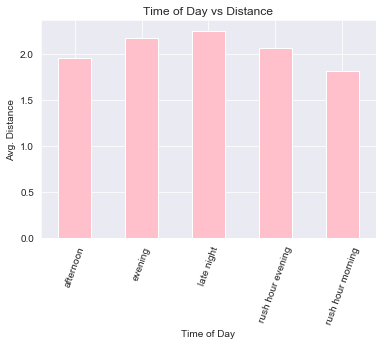

In [14]:
graph = averagedist.plot(kind="bar",
                   color="pink",
                   rot=70)
       

plt.ylabel("Avg. Distance")
plt.title("Time of Day vs Distance")
plt.xlabel("Time of Day")
plt.show()

In [15]:
averagedist = df.groupby(by="time_of_day").mean()["trip_duration"]
print(averagedist)  

time_of_day
afternoon            965.278183
evening              881.118012
late night           909.032137
rush hour evening    993.963070
rush hour morning    991.779339
Name: trip_duration, dtype: float64


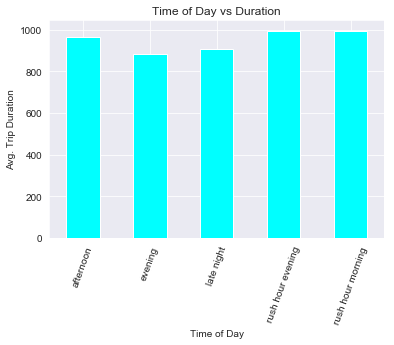

In [16]:
graph = averagedist.plot(kind="bar",
                   color="cyan",
                   rot=70)
       

plt.ylabel("Avg. Trip Duration")
plt.title("Time of Day vs Duration")
plt.xlabel("Time of Day")
plt.show()

## Hypothesis Testing

###  Does passenger group size affect the distance?

-  Null Hypothesis 𝐻0 : passenger group size has no effect on the distance.

-  Alternative Hypothesis 𝐻𝑎 : passenger group size has an effect on the distance.

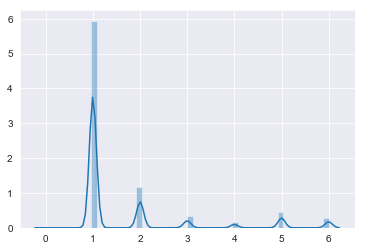

In [17]:
sns.distplot(df["passenger_count"].values, norm_hist=True)  
plt.show()

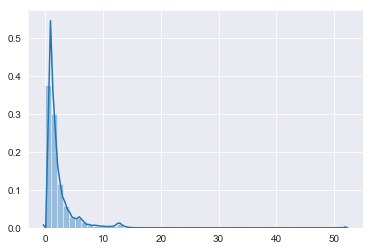

In [18]:
sns.distplot(df["distance"].values, norm_hist=True)  
plt.show()

In [19]:
one_pas= df[df["passenger_count"] == 1]["distance"]
two_pas= df[df["passenger_count"] == 2]["distance"]
three_pas= df[df["passenger_count"] == 3]["distance"]
four_pas= df[df["passenger_count"] == 4]["distance"]
five_pas= df[df["passenger_count"] == 5]["distance"]
six_pas =  df[df["passenger_count"] == 6]["distance"]

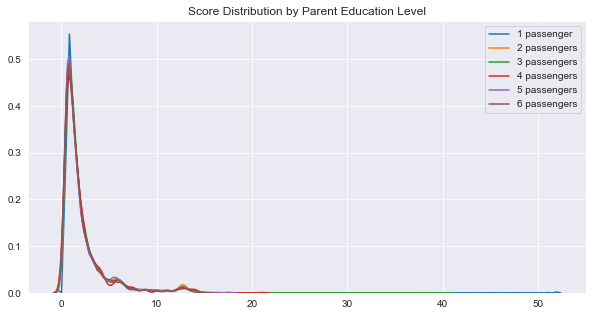

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

sns.kdeplot(one_pas, shade=False, ax=ax, label="1 passenger")
sns.kdeplot(two_pas, shade=False, ax=ax, label="2 passengers")
sns.kdeplot(three_pas, shade=False, ax=ax, label="3 passengers")
sns.kdeplot(four_pas, shade=False, ax=ax, label="4 passengers")
sns.kdeplot(five_pas, shade=False, ax=ax, label="5 passengers")
sns.kdeplot(six_pas, shade=False, ax=ax, label="6 passengers")

plt.title("Score Distribution by Parent Education Level")
plt.show()

In [21]:
stats.f_oneway(one_pas, two_pas, three_pas, four_pas, five_pas, six_pas)

F_onewayResult(statistic=7.283096305101685, pvalue=7.86179334693054e-07)

* When the significance level(α) is set to 0.05, pvalue is smaller than the significance value which means that null hypothesis is rejected.This result supports the alternative hypothesis which indicates that the passenger group size has an effect on the distance.
                

###  Do trip distances increase in weekends?

-  Null Hypothesis 𝐻0 : the day of week has no effect on the distance.
-  Alternative Hypothesis 𝐻𝑎 : the day of week has an effect on the distance.

In [22]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['day_of_week'] = df['pickup_datetime'].dt.day_name()

In [23]:
def day_found(day):

    if day == "Saturday" or day == "Sunday":
        return "weekend"
    
    else:
        return "weekday"

df["day_type"] = df["day_of_week"].apply(day_found)  
    


In [24]:
weekday = df[df["day_type"] == "weekday"]["distance"]  
weekend = df[df["day_type"] == "weekend"]["distance"]      

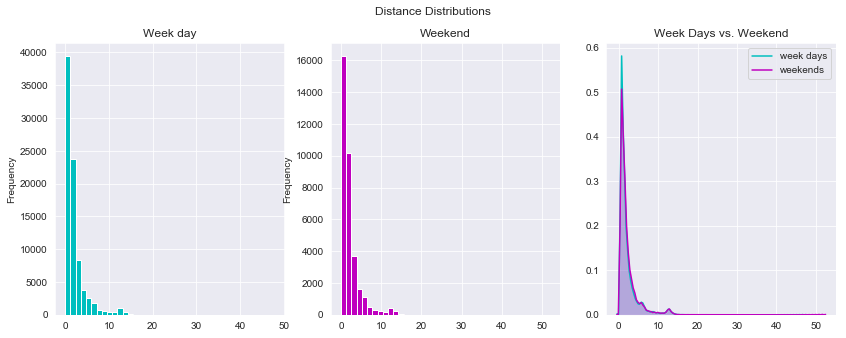

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
weekday.plot(kind="hist", ax=ax[0], bins=40, label="weekday", color="c")
ax[0].set_title("Week day")

weekend.plot(kind="hist", ax=ax[1], bins=40, label="weekend", color="m")
ax[1].set_title("Weekend")

sns.kdeplot(weekday, shade=True, label="week days", ax=ax[2], color="c")
sns.kdeplot(weekend, shade=True, label="weekends", ax=ax[2], color="m")
ax[2].set_title("Week Days vs. Weekend")

plt.suptitle("Distance Distributions")
plt.show()

In [26]:
stats.ttest_ind(weekend ,weekday , equal_var=False)

Ttest_indResult(statistic=5.604877366928616, pvalue=2.0924144330692153e-08)

* Since the significance level(α) is set to 0.05, pvalue is smaller than the significance value which means that null hypothesis is rejected.This result supports the alternative hypothesis which indicates that the day of weeks have an effect on the distance..